# Import of required libraries

In [271]:
import dash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Creation of dataframes

## Reading

In [272]:
covid_data = 'Data/covid-data.csv'
education_GDP_data = 'Data/Education-GDP.csv'
GDP_data = 'Data/GDP.csv'
gini_data = 'Data/gini.csv'
poverty_data = 'Data/poverty-explorer.csv'
trade_data = 'Data/trade.csv'
general_economy_data = 'Data/data_econo_covid.csv'

In [273]:
df_covid = pd.read_csv(covid_data, delimiter=',')
df_education = pd.read_csv(education_GDP_data, delimiter=',')
df_GDP = pd.read_csv(GDP_data, delimiter=',')
df_inequality = pd.read_csv(gini_data, delimiter=',')
df_poverty = pd.read_csv(poverty_data, delimiter=',') #--> I dont want to use it
df_trade = pd.read_csv(trade_data, delimiter=',')
df_economy = pd.read_csv(general_economy_data, delimiter=';')

In [274]:
df_economy

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0,38928341,"1803,987","0,498",#¡NUM!,#¡NUM!,#¡NUM!,"17,4772331","7,497754494"
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0,38928341,"1803,987","0,498",#¡NUM!,#¡NUM!,#¡NUM!,"17,4772331","7,497754494"
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0,38928341,"1803,987","0,498",#¡NUM!,#¡NUM!,#¡NUM!,"17,4772331","7,497754494"
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0,38928341,"1803,987","0,498",#¡NUM!,#¡NUM!,#¡NUM!,"17,4772331","7,497754494"
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0,38928341,"1803,987","0,498",#¡NUM!,#¡NUM!,#¡NUM!,"17,4772331","7,497754494"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,"76,85",14862927,"1899,775","0,535","8,994048296","5,442417711","4,34185547","16,51438055","7,549490737"
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,"76,85",14862927,"1899,775","0,535","8,996528148","5,442417711","4,34185547","16,51438055","7,549490737"
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,"76,85",14862927,"1899,775","0,535","8,999495876","5,442417711","4,34185547","16,51438055","7,549490737"
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,"76,85",14862927,"1899,775","0,535","9,000853147","5,442417711","4,34185547","16,51438055","7,549490737"


## Filtering by area

In [275]:
# We don't consider the islands

south_america = ['Chile', 'Argentina','Uruguay','Paraguay','Bolivia','Peru','Brazil','Ecuador',
                'Colombia']
north_america = ['Canada','United States', 'Mexico','Guatemala','Honduras','Nicaragua','Costa Rica','Panama',
                'Dominican Republic', 'Jamaica']

In [276]:
americas = south_america + north_america
df_americas = df_GDP[df_GDP['Entity'].isin(americas)]
df_covid = df_covid[df_covid['location'].isin(americas)]

In [277]:
# df_poverty_renamed = df_poverty.rename(columns={'Country': 'Entity'})
df_americas = pd.merge(df_americas, df_education, on=['Entity', 'Year'], how='left')
df_americas = pd.merge(df_americas, df_inequality, on=['Entity', 'Year'], how='left')
df_americas = pd.merge(df_americas, df_trade, on=['Entity', 'Year'], how='left')
# df_americas = pd.merge(df_americas, df_poverty_renamed, on=['Entity', 'Year'], how='left')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.



### Modification of format dataframe df_economy

In [278]:
df_economy_renamed = df_economy.rename(columns={'location': 'Entity'})
df_economy_renamed['date'] = pd.to_datetime(df_economy_renamed['date'])
df_economy_renamed['Year'] = df_economy_renamed['date'].dt.year
df_economy_renamed['Month'] = df_economy_renamed['date'].dt.month

# df_economy_grouped = df_economy_renamed.groupby(['Year', 'iso_code']).agg({'columna_a_agregar': 'sum'}).reset_index()
df_economy_americas = df_economy_renamed[df_economy_renamed['Entity'].isin(americas)]

### Modification of format dataframe df_covid

In [279]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['Year'] = df_covid['date'].dt.year
df_covid['Month'] = df_covid['date'].dt.month

# Analysis df_americas

In [280]:
df_americas.drop(['Code_x'], axis=1, inplace=True)
df_americas.drop(['Code_y'], axis=1, inplace=True)



In [281]:
description = df_americas.describe()
description

,Year,"Gross domestic product, constant prices - Percent change - Observations","Gross domestic product, constant prices - Percent change - Forecasts",Historical and more recent expenditure estimates,Gini coefficient,Trade (% of GDP)
count,931.000000,817.000000,133.000000,491.000000,425.000000,798.000000
mean,2004.000000,2.943876,2.936293,4.340724,0.477142,58.839908
std,14.149737,3.951143,1.427526,1.487877,0.074541,29.708136
min,1980.000000,-17.668000,-2.500000,0.773950,0.310191,11.545672
25%,1992.000000,1.200000,2.015000,3.287600,0.425798,36.361180
50%,2004.000000,3.462000,2.948000,4.342420,0.486455,53.553347
75%,2016.000000,5.052000,3.500000,5.354060,0.533428,75.455013
max,2028.000000,15.836000,10.809000,8.437110,0.632951,166.698150


In [282]:
df_americas.columns


Index(['Entity', 'Year',
       'Gross domestic product, constant prices - Percent change - Observations',
       'Gross domestic product, constant prices - Percent change - Forecasts',
       'Historical and more recent expenditure estimates', 'Gini coefficient',
       'Trade (% of GDP)'],
      dtype='object')

In [283]:
duplicate_values = df_americas.duplicated().any()
print(f'DataFrame has duplicate rows?: {duplicate_values}')

DataFrame has duplicate rows?: False


In [284]:
percentage_null = df_americas.isnull().mean() * 100
print(f" The percentage of null values for each column is  :\n {percentage_null}")

 The percentage of null values for each column is  :
 Entity                                                                      0.000000
Year                                                                        0.000000
Gross domestic product, constant prices - Percent change - Observations    12.244898
Gross domestic product, constant prices - Percent change - Forecasts       85.714286
Historical and more recent expenditure estimates                           47.261010
Gini coefficient                                                           54.350161
Trade (% of GDP)                                                           14.285714
dtype: float64


In [285]:
percentage_null_per_year = df_americas.groupby('Year').apply(lambda x: x.isnull().mean() * 100)
print(percentage_null_per_year)

      Entity  Year  \
Year                 
1980     0.0   0.0   
1981     0.0   0.0   
1982     0.0   0.0   
1983     0.0   0.0   
1984     0.0   0.0   
1985     0.0   0.0   
1986     0.0   0.0   
1987     0.0   0.0   
1988     0.0   0.0   
1989     0.0   0.0   
1990     0.0   0.0   
1991     0.0   0.0   
1992     0.0   0.0   
1993     0.0   0.0   
1994     0.0   0.0   
1995     0.0   0.0   
1996     0.0   0.0   
1997     0.0   0.0   
1998     0.0   0.0   
1999     0.0   0.0   
2000     0.0   0.0   
2001     0.0   0.0   
2002     0.0   0.0   
2003     0.0   0.0   
2004     0.0   0.0   
2005     0.0   0.0   
2006     0.0   0.0   
2007     0.0   0.0   
2008     0.0   0.0   
2009     0.0   0.0   
2010     0.0   0.0   
2011     0.0   0.0   
2012     0.0   0.0   
2013     0.0   0.0   
2014     0.0   0.0   
2015     0.0   0.0   
2016     0.0   0.0   
2017     0.0   0.0   
2018     0.0   0.0   
2019     0.0   0.0   
2020     0.0   0.0   
2021     0.0   0.0   
2022     0.0   0.0   
2023     0

In [286]:
fig = px.line(df_americas, x='Year', y='Gini coefficient', color='Entity', title='Evolution  of Gini Coefficient')
fig.show()


# Analysis df_covid

In [287]:
df_covid.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Year                                                int64
Month                                               int64
Length: 69, dtype: object

In [288]:
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [289]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Year,Month
13716,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1
13717,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1
13718,ARG,South America,Argentina,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,5.0,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1
13719,ARG,South America,Argentina,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,5.0,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1
13720,ARG,South America,Argentina,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,5.0,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368024,URY,South America,Uruguay,2024-03-01,1037893.0,0.0,0.0,7625.0,0.0,0.0,...,2.8,77.91,0.817,3422796.0,NaN,NaN,NaN,NaN,2024,3
368025,URY,South America,Uruguay,2024-03-02,1037893.0,0.0,0.0,7625.0,0.0,0.0,...,2.8,77.91,0.817,3422796.0,NaN,NaN,NaN,NaN,2024,3
368026,URY,South America,Uruguay,2024-03-03,1037893.0,0.0,0.0,7625.0,0.0,0.0,...,2.8,77.91,0.817,3422796.0,NaN,NaN,NaN,NaN,2024,3
368027,URY,South America,Uruguay,2024-03-04,1037893.0,0.0,0.0,7625.0,0.0,0.0,...,2.8,77.91,0.817,3422796.0,NaN,NaN,NaN,NaN,2024,3


In [290]:
variance_threshold = 0.1  # Ejemplo
df_var = df_covid.var()
columnas_baja_var = df_var[df_var < variance_threshold].index
df_covid = df_covid.drop(columnas_baja_var, axis=1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [291]:
threshold = 0.5 
df_covid = df_covid.dropna(thresh=int(threshold * len(df_covid)), axis=1)

In [292]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population,Year,Month
13716,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,45510324.0,2020,1
13717,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,45510324.0,2020,1
13718,ARG,South America,Argentina,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,45510324.0,2020,1
13719,ARG,South America,Argentina,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,45510324.0,2020,1
13720,ARG,South America,Argentina,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,45510324.0,2020,1


In [293]:
columns_to_remove = ['continent','new_cases_smoothed','new_deaths_smoothed',
                     'new_cases_per_million', 'new_cases_smoothed_per_million',
                     'total_deaths_per_million', 'new_deaths_per_million',
                     'new_deaths_smoothed_per_million','aged_65_older', 'aged_70_older','cardiovasc_death_rate', 'diabetes_prevalence',
                     'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','life_expectancy', 'handwashing_facilities',
                     'population','median_age','population_density','new_vaccinations_smoothed',
                     'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed'
                     ]

df_covid = df_covid.drop(columns = columns_to_remove)

In [294]:
df_covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'stringency_index', 'gdp_per_capita', 'extreme_poverty', 'Year',
       'Month'],
      dtype='object')

In [295]:
df_covid[df_covid['location'] == 'Argentina']


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Year,Month
13716,ARG,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,0.0,18933.907,0.6,2020,1
13717,ARG,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,0.0,18933.907,0.6,2020,1
13718,ARG,Argentina,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,18933.907,0.6,2020,1
13719,ARG,Argentina,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,18933.907,0.6,2020,1
13720,ARG,Argentina,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,18933.907,0.6,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15237,ARG,Argentina,2024-03-01,10084295.0,0.0,130573.0,0.0,221582.58,NaN,18933.907,0.6,2024,3
15238,ARG,Argentina,2024-03-02,10084295.0,0.0,130573.0,0.0,221582.58,NaN,18933.907,0.6,2024,3
15239,ARG,Argentina,2024-03-03,10084295.0,0.0,130573.0,0.0,221582.58,NaN,18933.907,0.6,2024,3
15240,ARG,Argentina,2024-03-04,10084295.0,0.0,130573.0,0.0,221582.58,NaN,18933.907,0.6,2024,3


In [296]:

porcentaje_nulos = df_covid.groupby(['Year']).apply(lambda x: x.isnull().mean() * 100)

porcentaje_nulos



,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Year,Month
Year,,,,,,,,,,,,,
2020,0.0,0.0,0.0,15.202312,0.086705,20.086705,0.057803,15.202312,0.0,0.0,5.260116,0.0,0.0
2021,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5.263158,0.0,0.0
2022,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.014420,0.000000,0.0,0.0,5.263158,0.0,0.0
2023,0.0,0.0,0.0,0.000000,3.244412,0.000000,0.028839,0.000000,100.0,0.0,5.263158,0.0,0.0
2024,0.0,0.0,0.0,0.000000,5.263158,0.000000,0.000000,0.000000,100.0,0.0,5.263158,0.0,0.0


In [297]:
df_covid[['total_cases', 'total_deaths', 'total_cases_per_million']] = df_covid[['total_cases', 'total_deaths', 'total_cases_per_million']].fillna(0)



# Analysis df_economy_americas

In [298]:
df_economy_americas


,iso_code,Entity,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,TC,TD,STI,POP,GDPCAP,Year,Month
1672,ARG,Argentina,2020-02-11,NaN,NaN,"11,11",45195777,"18933,907","0,825",#¡NUM!,#¡NUM!,"2,407845604","17,62651421","9,848709615",2020,2
1673,ARG,Argentina,2020-02-12,NaN,NaN,"11,11",45195777,"18933,907","0,825",#¡NUM!,#¡NUM!,"2,407845604","17,62651421","9,848709615",2020,2
1674,ARG,Argentina,2020-02-13,NaN,NaN,"11,11",45195777,"18933,907","0,825",#¡NUM!,#¡NUM!,"2,407845604","17,62651421","9,848709615",2020,2
1675,ARG,Argentina,2020-02-14,NaN,NaN,"11,11",45195777,"18933,907","0,825",#¡NUM!,#¡NUM!,"2,407845604","17,62651421","9,848709615",2020,2
1676,ARG,Argentina,2020-02-15,NaN,NaN,"11,11",45195777,"18933,907","0,825",#¡NUM!,#¡NUM!,"2,407845604","17,62651421","9,848709615",2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,URY,Uruguay,2020-10-15,2338.0,51.0,"36,11",3473727,"20551,409","0,804","7,757051142","3,931825633","3,586569835","15,06073864","9,930684782",2020,10
48840,URY,Uruguay,2020-10-16,2417.0,51.0,"36,11",3473727,"20551,409","0,804","7,790282381","3,931825633","3,586569835","15,06073864","9,930684782",2020,10
48841,URY,Uruguay,2020-10-17,2450.0,51.0,"36,11",3473727,"20551,409","0,804","7,803843304","3,931825633","3,586569835","15,06073864","9,930684782",2020,10
48842,URY,Uruguay,2020-10-18,2501.0,51.0,"36,11",3473727,"20551,409","0,804","7,824445931","3,931825633","3,586569835","15,06073864","9,930684782",2020,10


In [299]:
type_of_data = df_economy_renamed.dtypes
type_of_data

iso_code                           object
Entity                             object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
stringency_index                   object
population                          int64
gdp_per_capita                     object
human_development_index            object
TC                                 object
TD                                 object
STI                                object
POP                                object
GDPCAP                             object
Year                                int64
Month                               int64
dtype: object

In [300]:
drop = ['TC', 'TD', 'STI', 'POP', 'GDPCAP','population']
df_economy_americas = df_economy_americas.drop(columns = drop)

In [301]:
df_economy_americas

,iso_code,Entity,date,total_cases,total_deaths,stringency_index,gdp_per_capita,human_development_index,Year,Month
1672,ARG,Argentina,2020-02-11,NaN,NaN,"11,11","18933,907","0,825",2020,2
1673,ARG,Argentina,2020-02-12,NaN,NaN,"11,11","18933,907","0,825",2020,2
1674,ARG,Argentina,2020-02-13,NaN,NaN,"11,11","18933,907","0,825",2020,2
1675,ARG,Argentina,2020-02-14,NaN,NaN,"11,11","18933,907","0,825",2020,2
1676,ARG,Argentina,2020-02-15,NaN,NaN,"11,11","18933,907","0,825",2020,2
...,...,...,...,...,...,...,...,...,...,...
48839,URY,Uruguay,2020-10-15,2338.0,51.0,"36,11","20551,409","0,804",2020,10
48840,URY,Uruguay,2020-10-16,2417.0,51.0,"36,11","20551,409","0,804",2020,10
48841,URY,Uruguay,2020-10-17,2450.0,51.0,"36,11","20551,409","0,804",2020,10
48842,URY,Uruguay,2020-10-18,2501.0,51.0,"36,11","20551,409","0,804",2020,10


In [302]:
columnas_a_convertir = ['stringency_index', 'human_development_index','gdp_per_capita']

# Convertir las columnas especificadas a float
for columna in columnas_a_convertir:
    df_economy_americas[columna] = df_economy_americas[columna].str.replace(',', '.').astype(float)


In [303]:
columnas_a_convertir = ['stringency_index', 'human_development_index','gdp_per_capita']

# Convertir las columnas especificadas a float
for columna in columnas_a_convertir:
    df_economy_americas[columna] = df_economy_americas[columna].str.replace(',', '.').astype(float)


AttributeError: Can only use .str accessor with string values!

In [ ]:
df_economy_americas

,iso_code,Entity,date,total_cases,total_deaths,stringency_index,gdp_per_capita,human_development_index,Year,Month
1672,ARG,Argentina,2020-02-11,NaN,NaN,11.11,18933.907,0.825,2020,2
1673,ARG,Argentina,2020-02-12,NaN,NaN,11.11,18933.907,0.825,2020,2
1674,ARG,Argentina,2020-02-13,NaN,NaN,11.11,18933.907,0.825,2020,2
1675,ARG,Argentina,2020-02-14,NaN,NaN,11.11,18933.907,0.825,2020,2
1676,ARG,Argentina,2020-02-15,NaN,NaN,11.11,18933.907,0.825,2020,2
...,...,...,...,...,...,...,...,...,...,...
49498,VEN,Venezuela,2020-10-15,85005.0,714.0,87.96,16745.022,0.761,2020,10
49499,VEN,Venezuela,2020-10-16,85469.0,720.0,NaN,16745.022,0.761,2020,10
49500,VEN,Venezuela,2020-10-17,85469.0,720.0,NaN,16745.022,0.761,2020,10
49501,VEN,Venezuela,2020-10-18,85758.0,725.0,NaN,16745.022,0.761,2020,10


# Input Data

## df_americas

In [ ]:
df_americas.columns

Index(['Entity', 'Year',
       'Gross domestic product, constant prices - Percent change - Observations',
       'Gross domestic product, constant prices - Percent change - Forecasts',
       'Historical and more recent expenditure estimates', 'Gini coefficient',
       'Trade (% of GDP)'],
      dtype='object')

In [ ]:
nul_values = df_americas.isnull().sum()
porcentage_nul = (nul_values / len(df_americas)) * 100
print(porcentage_nul)

Entity                                                                      0.000000
Year                                                                        0.000000
Gross domestic product, constant prices - Percent change - Observations    12.542662
Gross domestic product, constant prices - Percent change - Forecasts       85.409556
Historical and more recent expenditure estimates                           51.706485
Gini coefficient                                                           61.945392
Trade (% of GDP)                                                           19.197952
dtype: float64


In [ ]:
df_americas2 = df_americas.copy()

In [ ]:
from sklearn.impute import KNNImputer

columnas_para_imputar = [
    'Gross domestic product, constant prices - Percent change - Observations',
    'Historical and more recent expenditure estimates',
    'Gini coefficient',
    'Trade (% of GDP)'
]
datos_para_imputar = df_americas2[columnas_para_imputar]
knn_imputer = KNNImputer(n_neighbors=5)
df_americas2_knn_imputed = knn_imputer.fit_transform(datos_para_imputar)
df_americas2_knn_imputed_df = pd.DataFrame(df_americas2_knn_imputed, columns=columnas_para_imputar)

df_americas2[columnas_para_imputar] = df_americas2_knn_imputed

In [ ]:
nul_values = df_americas2.isnull().sum()
porcentage_nul = (nul_values / len(df_americas2)) * 100
print(porcentage_nul)

Entity                                                                      0.000000
Year                                                                        0.000000
Gross domestic product, constant prices - Percent change - Observations     0.000000
Gross domestic product, constant prices - Percent change - Forecasts       85.409556
Historical and more recent expenditure estimates                            0.000000
Gini coefficient                                                            0.000000
Trade (% of GDP)                                                            0.000000
dtype: float64


## df_economy_americas

In [ ]:
nul_values = df_economy_americas.isnull().sum()
porcentage_nul = (nul_values / len(df_economy_americas)) * 100
print(porcentage_nul)

iso_code                    0.000000
Entity                      0.000000
date                        0.000000
total_cases                 5.475361
total_deaths               11.597810
stringency_index            6.387921
gdp_per_capita              3.633649
human_development_index     0.000000
Year                        0.000000
Month                       0.000000
dtype: float64


In [ ]:
df_economy_americas.dtypes

iso_code                           object
Entity                             object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
stringency_index                  float64
gdp_per_capita                    float64
human_development_index           float64
Year                                int64
Month                               int64
dtype: object

In [ ]:
df_economy_americas2 = df_economy_americas.copy()

columnas_para_imputar = [
    'total_cases',
    'total_deaths',
    'stringency_index',
    'gdp_per_capita'
]
imputador = KNNImputer(n_neighbors=5)
datos_para_imputar = df_economy_americas2[columnas_para_imputar]
df_economy_americas2_imputed = imputador.fit_transform(datos_para_imputar)
df_economy_americas2_imputed_df = pd.DataFrame(df_economy_americas2_imputed, columns=columnas_para_imputar)

df_economy_americas2[columnas_para_imputar] = df_economy_americas2_imputed

In [ ]:
nul_values = df_economy_americas2.isnull().sum()
porcentage_nul = (nul_values / len(df_economy_americas2)) * 100
print(porcentage_nul)

iso_code                   0.0
Entity                     0.0
date                       0.0
total_cases                0.0
total_deaths               0.0
stringency_index           0.0
gdp_per_capita             0.0
human_development_index    0.0
Year                       0.0
Month                      0.0
dtype: float64


## df_covid

In [ ]:
nul_values = df_covid.isnull().sum()
porcentage_nul = (nul_values / len(df_covid)) * 100
print(porcentage_nul)

iso_code                    0.000000
location                    0.000000
date                        0.000000
total_cases                 0.000000
total_deaths                0.000000
total_cases_per_million     0.000000
stringency_index           28.211326
gdp_per_capita              0.000000
extreme_poverty             5.262431
Year                        0.000000
Month                       0.000000
dtype: float64


In [ ]:

columnas_para_imputar = [
    'stringency_index',
    'extreme_poverty',
]
imputador = KNNImputer(n_neighbors=5)
datos_para_imputar = df_covid[columnas_para_imputar]
df_covid_imputed = imputador.fit_transform(datos_para_imputar)
df_covid_imputed_df = pd.DataFrame(df_covid_imputed, columns=columnas_para_imputar)

df_covid[columnas_para_imputar] = df_covid_imputed

# Cluster Data

In [ ]:
df_covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'total_cases_per_million', 'stringency_index', 'gdp_per_capita',
       'extreme_poverty', 'Year', 'Month'],
      dtype='object')

In [ ]:
df_americas2.columns

Index(['Entity', 'Year',
       'Gross domestic product, constant prices - Percent change - Observations',
       'Gross domestic product, constant prices - Percent change - Forecasts',
       'Historical and more recent expenditure estimates', 'Gini coefficient',
       'Trade (% of GDP)'],
      dtype='object')

## df_americas

In [ ]:
df_americas3 = df_americas2.copy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd


# Seleccionamos solo las columnas numéricas para el clustering
df_clustering = df_americas3.select_dtypes(include=['float64', 'int64'])

df_clustering = df_clustering.fillna(df_clustering.mean())

# Estandarización de los datos
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Silhouette score para evaluar la calidad de los clusters
silhouette_scores = []
for i in range(2, 11): # Silhouette score no se puede calcular para un solo cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled)
    score = silhouette_score(df_clustering_scaled, kmeans.labels_)
    silhouette_scores.append(score)


kmeans_final = KMeans(n_clusters=3, random_state=42) # Cambia 3 por el número óptimo encontrado
kmeans_final.fit(df_clustering_scaled)

# Asignamos las etiquetas de los clusters al DataFrame original
df_americas3['Cluster'] = kmeans_final.labels_

# Ahora df_americas2 tiene una nueva columna 'Cluster' que indica el grupo de cada país


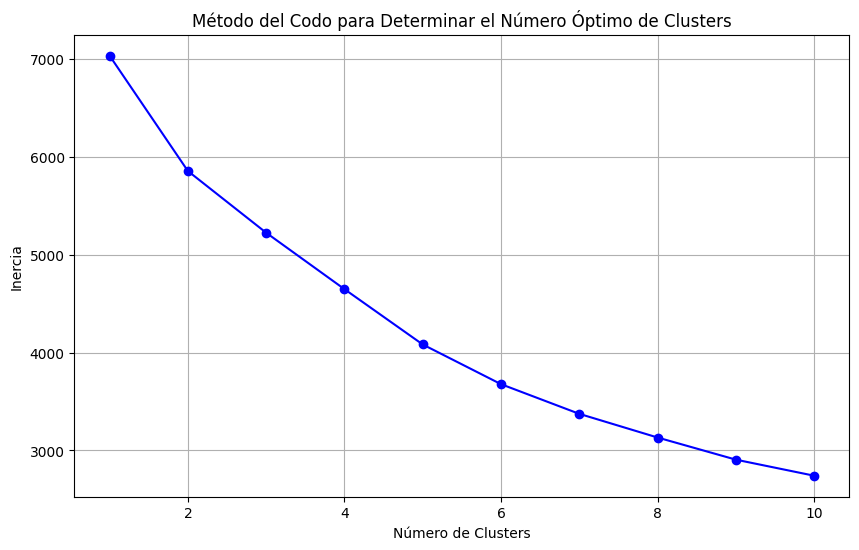

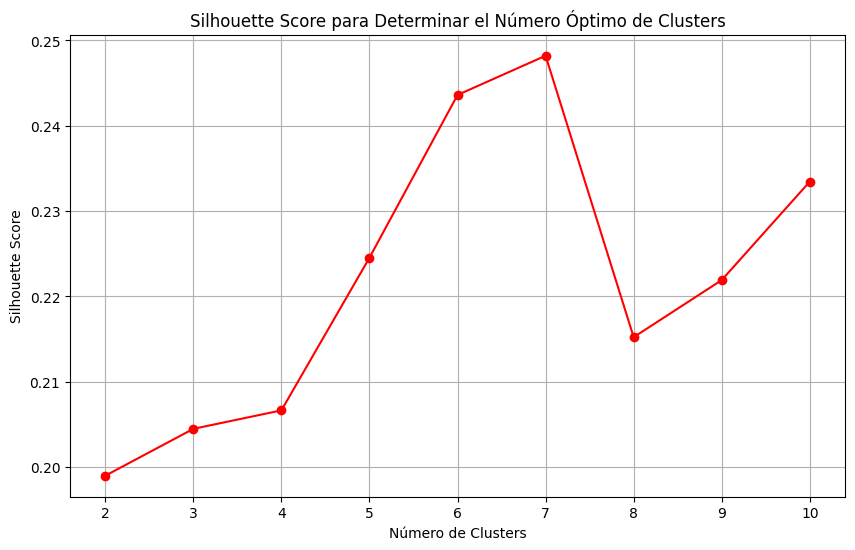

In [ ]:

# Gráfico del Método del Codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Gráfico de Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


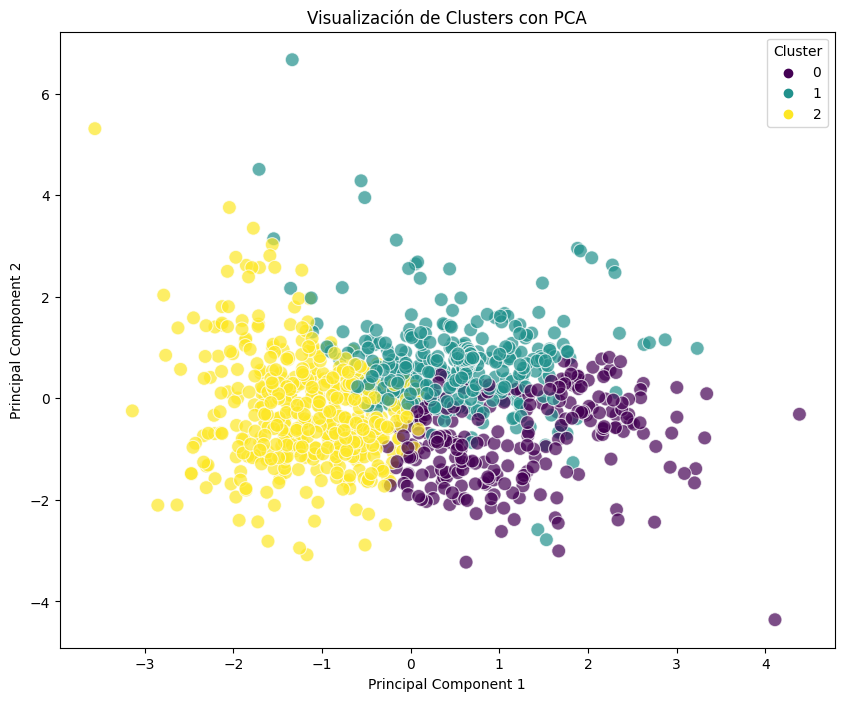

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Realizamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering_scaled)

# Convertimos los resultados en un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Añadimos la información de los clusters al DataFrame de PCA
df_pca['Cluster'] = kmeans_final.labels_

# Visualización con Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7, s=100)

plt.title('Visualización de Clusters con PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
df_americas3[df_americas3['Entity'] == 'Chile']
# df_americas3

,Entity,Year,"Gross domestic product, constant prices - Percent change - Observations","Gross domestic product, constant prices - Percent change - Forecasts",Historical and more recent expenditure estimates,Gini coefficient,Trade (% of GDP),Cluster
294,Chile,1980,7.945000,NaN,4.220000,0.506990,48.120030,2
295,Chile,1981,6.212000,NaN,4.914300,0.514681,41.759415,2
296,Chile,1982,-13.588000,NaN,4.393544,0.444290,39.865210,0
297,Chile,1983,-2.802000,NaN,5.359859,0.429631,44.820034,0
298,Chile,1984,5.886000,NaN,3.522771,0.462173,47.261803,2
299,Chile,1985,1.968000,NaN,4.900191,0.477698,50.583824,0
300,Chile,1986,5.596000,NaN,4.351253,0.436374,52.053710,0
301,Chile,1987,6.581000,NaN,2.823290,0.562102,54.193035,2
302,Chile,1988,7.288000,NaN,2.835490,0.464697,58.454540,2
303,Chile,1989,10.605000,NaN,3.450726,0.492255,62.972923,2


In [ ]:
moda_clusters = df_americas3.groupby('Entity')['Cluster'].agg(pd.Series.mode)

clusters_moda_dict = moda_clusters.to_dict()

for key, value in clusters_moda_dict.items():
    if isinstance(value, pd.Series):
        clusters_moda_dict[key] = value.iloc[0]

print(clusters_moda_dict)


{'Argentina': 2, 'Bahamas': 2, 'Belize': array([1, 2], dtype=int32), 'Bolivia': 1, 'Brazil': 2, 'Canada': 0, 'Chile': 2, 'Colombia': 2, 'Costa Rica': 1, 'Dominican Republic': 2, 'Ecuador': 2, 'Guatemala': 2, 'Guyana': 1, 'Honduras': 2, 'Jamaica': 1, 'Mexico': 1, 'Nicaragua': 1, 'Panama': 2, 'Paraguay': 2, 'Peru': 2, 'Suriname': 1, 'United States': 0, 'Uruguay': 2, 'Venezuela': 0}


In [ ]:
df_americas3 = df_americas3[df_americas3['Entity'] != 'Belize']
df_americas3['Cluster2'] = df_americas3['Entity'].map(clusters_moda_dict)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_americas3

,Entity,Year,"Gross domestic product, constant prices - Percent change - Observations","Gross domestic product, constant prices - Percent change - Forecasts",Historical and more recent expenditure estimates,Gini coefficient,Trade (% of GDP),Cluster,Cluster2
0,Argentina,1980,0.700000,NaN,2.607150,0.546735,11.545672,2,2
1,Argentina,1981,-5.744000,NaN,3.584939,0.546209,14.292977,2,2
2,Argentina,1982,-3.149000,NaN,1.597870,0.520567,15.611486,2,2
3,Argentina,1983,3.733000,NaN,1.617500,0.579658,14.987670,2,2
4,Argentina,1984,2.000000,NaN,2.569720,0.521825,12.346381,2,2
...,...,...,...,...,...,...,...,...,...
1167,Venezuela,2020,2.795708,-29.995,4.369025,0.478737,65.040680,1,0
1168,Venezuela,2021,2.795708,1.000,4.369025,0.478737,65.040680,1,0
1169,Venezuela,2022,2.795708,8.000,4.369025,0.478737,65.040680,1,0
1170,Venezuela,2023,2.795708,4.000,4.369025,0.478737,65.040680,1,0


## df_covid

In [ ]:
df_covid.dtypes

iso_code                           object
location                           object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
total_cases_per_million           float64
stringency_index                  float64
gdp_per_capita                    float64
extreme_poverty                   float64
Year                                int64
Month                               int64
dtype: object

In [ ]:
df_covid[df_covid['location'] == 'Uruguay']

,iso_code,location,date,total_cases,total_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Year,Month
366505,URY,Uruguay,2020-01-03,0.0,0.0,0.000,0.000,20551.409,0.1,2020,1
366506,URY,Uruguay,2020-01-04,0.0,0.0,0.000,0.000,20551.409,0.1,2020,1
366507,URY,Uruguay,2020-01-05,0.0,0.0,0.000,0.000,20551.409,0.1,2020,1
366508,URY,Uruguay,2020-01-06,0.0,0.0,0.000,0.000,20551.409,0.1,2020,1
366509,URY,Uruguay,2020-01-07,0.0,0.0,0.000,0.000,20551.409,0.1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
368024,URY,Uruguay,2024-03-01,1037893.0,7625.0,303229.582,67.778,20551.409,0.1,2024,3
368025,URY,Uruguay,2024-03-02,1037893.0,7625.0,303229.582,67.778,20551.409,0.1,2024,3
368026,URY,Uruguay,2024-03-03,1037893.0,7625.0,303229.582,67.778,20551.409,0.1,2024,3
368027,URY,Uruguay,2024-03-04,1037893.0,7625.0,303229.582,67.778,20551.409,0.1,2024,3


In [ ]:
df_covid2 = df_covid.copy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd


# Seleccionamos solo las columnas numéricas para el clustering
df_clustering2 = df_covid2.select_dtypes(include=['float64', 'int64'])

df_clustering2 = df_clustering2.fillna(df_clustering.mean())

# Estandarización de los datos
scaler = StandardScaler()
df_clustering_scaled2 = scaler.fit_transform(df_clustering2)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled2)
    inertia.append(kmeans.inertia_)

# Silhouette score para evaluar la calidad de los clusters
silhouette_scores = []
for i in range(2, 11): # Silhouette score no se puede calcular para un solo cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled2)
    score = silhouette_score(df_clustering_scaled2, kmeans.labels_)
    silhouette_scores.append(score)


kmeans_final = KMeans(n_clusters=3, random_state=42) # Cambia 3 por el número óptimo encontrado
kmeans_final.fit(df_clustering_scaled2)

# Asignamos las etiquetas de los clusters al DataFrame original
df_covid2['Cluster'] = kmeans_final.labels_


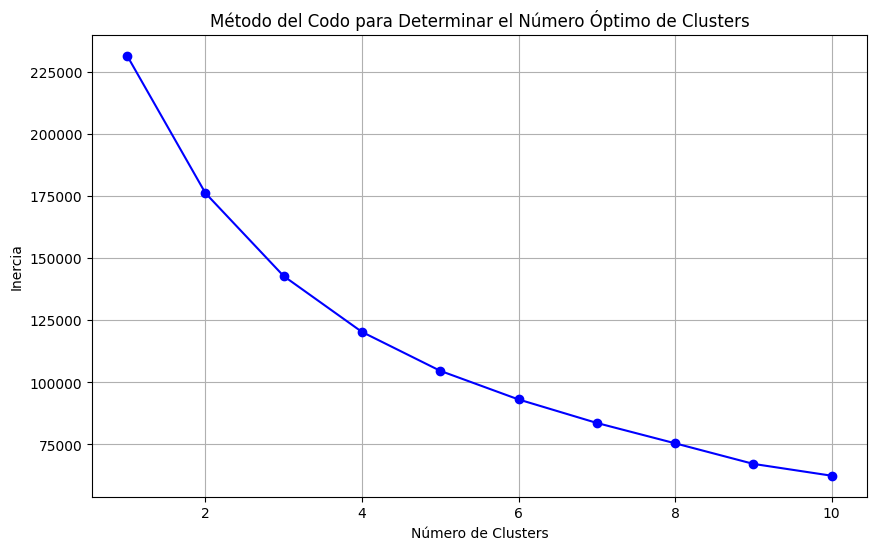

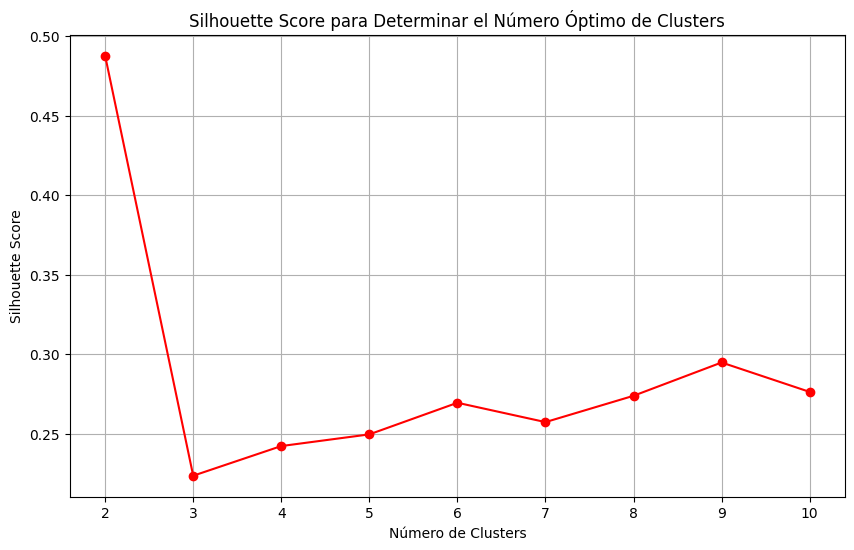

In [ ]:

# Gráfico del Método del Codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Gráfico de Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


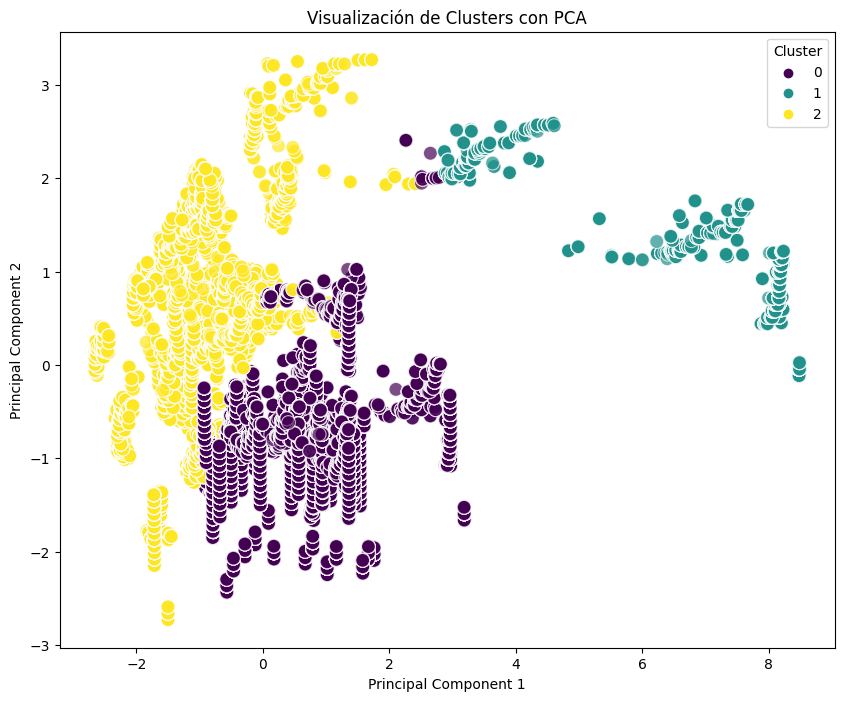

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Realizamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering_scaled2)

# Convertimos los resultados en un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Añadimos la información de los clusters al DataFrame de PCA
df_pca['Cluster'] = kmeans_final.labels_

# Visualización con Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7, s=100)

plt.title('Visualización de Clusters con PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
moda_clusters = df_covid2.groupby('location')['Cluster'].agg(pd.Series.mode)

clusters_moda_dict = moda_clusters.to_dict()

for key, value in clusters_moda_dict.items():
    if isinstance(value, pd.Series):
        clusters_moda_dict[key] = value.iloc[0]

print(clusters_moda_dict)


{'Argentina': 0, 'Bolivia': 0, 'Brazil': 0, 'Canada': 0, 'Chile': 0, 'Colombia': 0, 'Costa Rica': 0, 'Dominican Republic': 0, 'Ecuador': 2, 'Guatemala': 2, 'Honduras': 2, 'Jamaica': 2, 'Mexico': 0, 'Nicaragua': 0, 'Panama': 0, 'Paraguay': 0, 'Peru': 0, 'United States': 1, 'Uruguay': 0}


In [ ]:
df_covid2['Cluster2'] = df_covid2['location'].map(clusters_moda_dict)

In [ ]:
df_covid2[df_covid2['location'] == 'Chile']

,iso_code,location,date,total_cases,total_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Year,Month,Cluster,Cluster2
65534,CHL,Chile,2020-01-03,1.0,0.0,0.051,0.000,22767.037,1.3,2020,1,2,0
65535,CHL,Chile,2020-01-04,1.0,0.0,0.051,0.000,22767.037,1.3,2020,1,2,0
65536,CHL,Chile,2020-01-05,1.0,0.0,0.051,0.000,22767.037,1.3,2020,1,2,0
65537,CHL,Chile,2020-01-06,1.0,0.0,0.051,0.000,22767.037,1.3,2020,1,2,0
65538,CHL,Chile,2020-01-07,1.0,0.0,0.051,0.000,22767.037,1.3,2020,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67053,CHL,Chile,2024-03-01,5315728.0,61629.0,271158.926,64.448,22767.037,1.3,2024,3,0,0
67054,CHL,Chile,2024-03-02,5315728.0,61629.0,271158.926,64.448,22767.037,1.3,2024,3,0,0
67055,CHL,Chile,2024-03-03,5315728.0,61629.0,271158.926,64.448,22767.037,1.3,2024,3,0,0
67056,CHL,Chile,2024-03-04,5315728.0,61629.0,271158.926,64.448,22767.037,1.3,2024,3,0,0


In [ ]:
df_covid2[df_covid2['location'] == 'Canada']

,iso_code,location,date,total_cases,total_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Year,Month,Cluster,Cluster2
57914,CAN,Canada,2020-01-03,15.0,0.0,0.390,0.000,44017.591,0.5,2020,1,2,0
57915,CAN,Canada,2020-01-04,15.0,0.0,0.390,0.000,44017.591,0.5,2020,1,2,0
57916,CAN,Canada,2020-01-05,15.0,0.0,0.390,0.000,44017.591,0.5,2020,1,2,0
57917,CAN,Canada,2020-01-06,15.0,0.0,0.390,0.000,44017.591,0.5,2020,1,2,0
57918,CAN,Canada,2020-01-07,15.0,0.0,0.390,0.000,44017.591,0.5,2020,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59433,CAN,Canada,2024-03-01,4780335.0,54326.0,124312.015,68.896,44017.591,0.5,2024,3,0,0
59434,CAN,Canada,2024-03-02,4780335.0,54326.0,124312.015,68.896,44017.591,0.5,2024,3,0,0
59435,CAN,Canada,2024-03-03,4780335.0,54326.0,124312.015,68.896,44017.591,0.5,2024,3,0,0
59436,CAN,Canada,2024-03-04,4780335.0,54326.0,124312.015,68.896,44017.591,0.5,2024,3,0,0


# Add dataframes

## Economy

In [ ]:
df_americas3.columns

Index(['Entity', 'Year',
       'Gross domestic product, constant prices - Percent change - Observations',
       'Gross domestic product, constant prices - Percent change - Forecasts',
       'Historical and more recent expenditure estimates', 'Gini coefficient',
       'Trade (% of GDP)', 'Cluster', 'Cluster2'],
      dtype='object')

In [ ]:
df_americas4 = df_americas3.copy()

In [ ]:
df_americas4

,Entity,Year,GDP,GDP Forecast,Education,GINI,trade,Cluster,Cluster2
0,Argentina,1980,0.700000,NaN,2.607150,0.546735,11.545672,2,2
1,Argentina,1981,-5.744000,NaN,3.584939,0.546209,14.292977,2,2
2,Argentina,1982,-3.149000,NaN,1.597870,0.520567,15.611486,2,2
3,Argentina,1983,3.733000,NaN,1.617500,0.579658,14.987670,2,2
4,Argentina,1984,2.000000,NaN,2.569720,0.521825,12.346381,2,2
...,...,...,...,...,...,...,...,...,...
1167,Venezuela,2020,2.795708,-29.995,4.369025,0.478737,65.040680,1,0
1168,Venezuela,2021,2.795708,1.000,4.369025,0.478737,65.040680,1,0
1169,Venezuela,2022,2.795708,8.000,4.369025,0.478737,65.040680,1,0
1170,Venezuela,2023,2.795708,4.000,4.369025,0.478737,65.040680,1,0


In [ ]:
df_americas4 = df_americas4.rename(columns={'Gross domestic product, constant prices - Percent change - Observations': 'GDP', 
                                            'Gross domestic product, constant prices - Percent change - Forecasts': 'GDP Forecast',
                                            'Historical and more recent expenditure estimates' : 'Education', 
                                            'Gini coefficient': 'GINI',
                                            'Trade (% of GDP)' : 'trade'})

In [ ]:
df_americas4.columns

Index(['Entity', 'Year', 'GDP', 'GDP Forecast', 'Education', 'GINI', 'trade',
       'Cluster', 'Cluster2'],
      dtype='object')

In [ ]:
europas = 'df_economics_europe.csv'
df_europas = pd.read_csv(europas, delimiter=',')

In [ ]:
df_europas

,location,education,GDP,gini,median_income,poorest_decile_threshold,richest_decile_threshold,trade,continent,Year
0,Belgium,6.425340,1.620,0.273880,50.106460,25.195316,89.483215,165.325840,Europe,2017
1,Belgium,6.381070,1.793,0.272144,51.246574,26.038218,90.039635,166.494780,Europe,2018
2,Belgium,6.333970,2.262,0.272198,52.628468,27.698778,93.140700,164.176910,Europe,2019
3,Belgium,6.812330,-5.363,0.259583,53.040030,28.693867,91.954960,157.180730,Europe,2020
4,Belgium,6.234233,6.286,0.284037,39.714099,20.126681,70.713670,172.674450,Europe,2021
5,Belgium,5.005333,3.248,0.305781,44.786095,22.367731,84.200867,82.828154,Europe,2022
6,Finland,6.363110,3.192,0.273831,49.616215,28.033659,90.452280,75.053140,Europe,2017
7,Finland,6.275580,1.140,0.273298,50.388140,28.374876,91.765030,78.192170,Europe,2018
8,Finland,6.416950,1.224,0.277373,51.262200,28.351320,92.979256,79.605430,Europe,2019
9,Finland,6.634940,-2.355,0.270912,51.208990,29.307734,92.387900,71.634120,Europe,2020


In [ ]:
# Paso 1: Renombrar las columnas de df_europas para que coincidan con las de df_americas4
df_europas_renamed = df_europas.rename(columns={
    'location': 'Entity',
    'education': 'Education',
    'gini': 'GINI',
    # Añade aquí más renombramientos si es necesario
})

# Primero, identificamos todas las columnas únicas en ambos DataFrames
all_columns = list(set(df_americas4.columns) | set(df_europas_renamed.columns))

# Luego, reorganizamos las columnas en df_americas4 y df_europas_renamed, añadiendo NaN donde falten columnas
df_americas4_aligned = df_americas4.reindex(columns=all_columns)
df_europas_renamed_aligned = df_europas_renamed.reindex(columns=all_columns)

# Paso 3: Concatenar los DataFrames
df_concatenado = pd.concat([df_americas4_aligned, df_europas_renamed_aligned], axis=0, ignore_index=True)


In [ ]:
df_concatenado

,trade,Education,Cluster2,poorest_decile_threshold,Cluster,Entity,Year,richest_decile_threshold,median_income,GDP,continent,GDP Forecast,GINI
0,11.545672,2.607150,2,NaN,2.0,Argentina,1980,NaN,NaN,0.700,NaN,NaN,0.546735
1,14.292977,3.584939,2,NaN,2.0,Argentina,1981,NaN,NaN,-5.744,NaN,NaN,0.546209
2,15.611486,1.597870,2,NaN,2.0,Argentina,1982,NaN,NaN,-3.149,NaN,NaN,0.520567
3,14.987670,1.617500,2,NaN,2.0,Argentina,1983,NaN,NaN,3.733,NaN,NaN,0.579658
4,12.346381,2.569720,2,NaN,2.0,Argentina,1984,NaN,NaN,2.000,NaN,NaN,0.521825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,86.470670,3.319180,NaN,6.281528,NaN,Romania,2018,23.890923,12.660549,6.030,Europe,NaN,0.287829
1167,84.503060,3.566950,NaN,6.332291,NaN,Romania,2019,39.081493,19.027610,3.844,Europe,NaN,0.348042
1168,78.059110,3.589260,NaN,6.883793,NaN,Romania,2020,43.306770,21.184145,-3.692,Europe,NaN,0.345725
1169,87.358390,3.253052,NaN,13.859754,NaN,Romania,2021,61.504145,31.199734,5.874,Europe,NaN,0.326349


## Covid

In [ ]:
covid_C = 'df_covid_HICP_europe.csv'
df_covid_C = pd.read_csv(covid_C, delimiter=',')

In [ ]:
df_covid_C

,date,HICP,location,total_deaths,stringency_index,total_cases_per_million,continent
0,2020-01,0.111186,France,0.0,0.00,0.248,Europe
1,2020-02,0.111847,France,0.0,5.56,0.248,Europe
2,2020-03,0.113388,France,713.0,56.94,0.248,Europe
3,2020-04,0.112948,France,12062.0,87.96,0.248,Europe
4,2020-05,0.116691,France,17992.0,76.85,77.878,Europe
...,...,...,...,...,...,...,...
339,2023-01,2.131702,Italy,186158.0,0.00,429911.498,Europe
340,2023-02,1.937930,Italy,189155.0,0.00,435336.171,Europe
341,2023-03,1.568001,Italy,188974.0,0.00,434980.482,Europe
342,2023-04,1.539376,Italy,189627.0,0.00,436544.082,Europe


In [ ]:
df_covid2

,Year,Month,location,total_cases,total_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Cluster,Cluster2,Date
0,2020,1,Argentina,0.0,0.0,0.000,0.000,18933.907,0.6,2.0,0.0,2020-01-01
1,2020,1,Bolivia,0.0,0.0,0.000,0.000,6885.829,7.1,2.0,0.0,2020-01-01
2,2020,1,Brazil,1.0,0.0,0.005,0.000,14103.452,3.4,2.0,0.0,2020-01-01
3,2020,1,Canada,15.0,0.0,0.390,0.000,44017.591,0.5,2.0,0.0,2020-01-01
4,2020,1,Chile,1.0,0.0,0.051,0.000,22767.037,1.3,2.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
964,2024,3,Panama,1039328.0,8656.0,235751.087,64.072,22267.037,2.2,0.0,0.0,2024-03-01
965,2024,3,Paraguay,735759.0,19880.0,108507.104,50.000,8827.010,1.7,0.0,0.0,2024-03-01
966,2024,3,Peru,4525456.0,220716.0,132907.805,63.890,12236.706,3.5,0.0,0.0,2024-03-01
967,2024,3,United States,103436829.0,1177223.0,305763.910,36.826,54225.446,1.2,1.0,1.0,2024-03-01


In [ ]:
# Renombrar columnas para que coincidan en ambos DataFrames, si es necesario
df_covid_C.rename(columns={'date': 'Date'}, inplace=True)

# Añadir las columnas faltantes en df_covid_C con valores NaN, excepto 'HICP' y 'continent'
columns_to_add = [col for col in df_covid2.columns if col not in df_covid_C.columns and col not in ['HICP', 'continent']]
for column in columns_to_add:
    df_covid_C[column] = pd.NA

# Asegúrate de que las columnas que quieres mantener ('HICP' y 'continent') estén presentes en df_covid2
# Si no están, las agregamos con valores NaN
for column in ['HICP', 'continent']:
    if column not in df_covid2.columns:
        df_covid2[column] = pd.NA

# Seleccionar y reordenar las columnas en df_covid_C para que coincidan con df_covid2
df_covid_C = df_covid_C[df_covid2.columns]

# Concatenar ambos DataFrames
df_covid_combined = pd.concat([df_covid2, df_covid_C], ignore_index=True)


In [ ]:
df_covid_combined[df_covid_combined['location'] == 'Belgium']

,Year,Month,location,total_cases,total_deaths,total_cases_per_million,stringency_index,gdp_per_capita,extreme_poverty,Cluster,Cluster2,Date,HICP,continent
1015,<NA>,<NA>,Belgium,<NA>,0.0,0.0860,0.000,<NA>,<NA>,<NA>,<NA>,2020-01,-0.558427,Europe
1016,<NA>,<NA>,Belgium,<NA>,0.0,0.0860,11.110,<NA>,<NA>,<NA>,<NA>,2020-02,-0.644400,Europe
1017,<NA>,<NA>,Belgium,<NA>,149.0,383.7530,50.930,<NA>,<NA>,<NA>,<NA>,2020-03,-0.773359,Europe
1018,<NA>,<NA>,Belgium,<NA>,5866.0,3536.8280,81.480,<NA>,<NA>,<NA>,<NA>,2020-04,-0.859332,Europe
1019,<NA>,<NA>,Belgium,<NA>,9212.0,4943.5810,75.000,<NA>,<NA>,<NA>,<NA>,2020-05,-0.902319,Europe
1020,<NA>,<NA>,Belgium,<NA>,9635.0,5211.5565,51.850,<NA>,<NA>,<NA>,<NA>,2020-06,-0.816346,Europe
1021,<NA>,<NA>,Belgium,<NA>,9697.0,5292.7600,51.850,<NA>,<NA>,<NA>,<NA>,2020-07,-0.493947,Europe
1022,<NA>,<NA>,Belgium,<NA>,9903.0,6737.0900,60.190,<NA>,<NA>,<NA>,<NA>,2020-08,-1.052771,Europe
1023,<NA>,<NA>,Belgium,<NA>,10030.0,8089.5350,52.780,<NA>,<NA>,<NA>,<NA>,2020-09,-0.751866,Europe
1024,<NA>,<NA>,Belgium,<NA>,10083.0,9875.4940,47.220,<NA>,<NA>,<NA>,<NA>,2020-10,-0.773359,Europe


# Dash API

In [ ]:
df_covid2 = df_covid2.groupby(['Year', 'Month', 'location']).median().reset_index()


In [ ]:
df_covid2['Date'] = pd.to_datetime(df_covid2['Year'].astype(str) + '/' + df_covid2['Month'].astype(str))

In [304]:
df_concatenado.columns

Index(['trade', 'Education', 'Cluster2', 'poorest_decile_threshold', 'Cluster',
       'Entity', 'Year', 'richest_decile_threshold', 'median_income', 'GDP',
       'continent', 'GDP Forecast', 'GINI'],
      dtype='object')

In [ ]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])

# Map
fig_map = px.scatter_geo(df_concatenado, locations="Entity", locationmode='country names',
                         hover_name="Entity", projection="natural earth")


# Navbar
navbar = dbc.NavbarSimple(
    children=[
        dbc.NavItem(dbc.NavLink("Economic Factor", href="/page-1")),
        dbc.NavItem(dbc.NavLink("Covid Factor", href="/page-2")),
    ],
    brand="My first DashBoard",
    brand_href="/",
    color="primary",
    dark=True,
)

# Layout page 1
layout_page_1 = dbc.Container([
    html.H1("Economic and Social Evolution by Country"),
    dbc.Row(dbc.Col(html.Div("Select a country by clicking on the map below:"))),
    dbc.Row(dbc.Col(dcc.Graph(id='world-map', figure=fig_map))),
    html.Div(id='country-selected'),
    dbc.Row(dbc.Col(html.H4("Choose a variable to display:"))),
    dbc.Row(dbc.Col(dcc.Dropdown(
        id='variable-dropdown',
        options=[{'label': i, 'value': i} for i in df_concatenado.columns[2:]],
        value=df_concatenado.columns[2]  # default value
    ))),
    dbc.Row(dbc.Col(html.Div("Graphical representation:"))),
    dbc.Row([
        dbc.Col(dcc.Graph(id='feature-graph'), width=6),
        dbc.Col([
            html.H4("Monthly Data Visualization"),
            dcc.Dropdown(
                id='monthly-data-dropdown',
                options=[{'label': i, 'value': i} for i in df_covid_combined.columns[3:]],  # Asume que la columna 3 tiene datos mensuales
                value=df_covid_combined.columns[3]  # default value
            ),
            dcc.Graph(id='monthly-data-graph')  # Gráfico para datos mensuales
        ], width=6)
    ]),
    dbc.Row(dbc.Col(html.Div(id='analysis-box')))
], fluid=True)


# Layout page 2
layout_page_2 = dbc.Container([
    html.H1("COVID-19 Data Visualization"),
    dbc.Row([
        dbc.Col(html.Div("Select a country:"), width=3),
        dbc.Col(dcc.Dropdown(
            id='country-dropdown-page2',
            options=[{'label': country, 'value': country} for country in df_covid_combined['location'].unique()],
            value='Argentina'
        ), width=9),
    ]),
    dbc.Row([
        dbc.Col(html.Div("Select a variable:"), width=3),
        dbc.Col(dcc.Dropdown(
            id='variable-dropdown-page2',
            options=[
                {'label': 'Total Cases', 'value': 'total_cases'},
                {'label': 'Total Deaths', 'value': 'total_deaths'},
                # Puedes agregar más variables aquí según sea necesario
            ],
            value='total_cases'  # Valor predeterminado
        ), width=9),
    ]),
    dbc.Row(dbc.Col(dcc.Graph(id='evolution-graph-page2'))),
], fluid=True)


# Principal page (default)
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    navbar,
    html.Div(id='page-content')
])

# Callback 1
@app.callback(Output('page-content', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/page-1':
        return layout_page_1
    elif pathname == '/page-2':
        return layout_page_2
    else:
        return "Welcome! Please choose a page."

# Callback 2
@app.callback(
    [Output('country-selected', 'children'),
     Output('feature-graph', 'figure'),
     Output('monthly-data-graph', 'figure'),  # Añadido para actualizar el gráfico mensual
     Output('analysis-box', 'children')],
    [Input('world-map', 'clickData'),
     Input('variable-dropdown', 'value'),
     Input('monthly-data-dropdown', 'value')])  # Añadido para escuchar cambios en el dropdown mensual
def update_graph(clickData, selected_variable, selected_monthly_variable):
    if clickData is None:
        analysis_text = 'Choose a country and a variable to see the analysis.'
        return 'Choose a country', {}, {}, analysis_text
    else:
        country_name = clickData['points'][0]['location']
        df_filtered = df_concatenado[df_concatenado['Entity'] == country_name]
        df_filtered_monthly = df_covid_combined[df_covid_combined['location'] == country_name]

        fig = px.line(df_filtered, x='Year', y=selected_variable, title=f'Annual {selected_variable} for {country_name}',
                      template="plotly_white")
        fig.update_layout(
            title={'text': f'Annual {selected_variable} for {country_name}', 'x': 0.5, 'xanchor': 'center'},
            xaxis_title="Year",
            yaxis_title=selected_variable,
            height=400,  # Ajusta el tamaño del gráfico
            font=dict(size=12)  # Ajusta el tamaño del texto global, incluyendo los títulos de los ejes
        )

        fig_monthly = px.line(df_filtered_monthly, x='Date', y=selected_monthly_variable,
                      title=f'Monthly {selected_monthly_variable} in {country_name}', template="plotly_white",
                      color_discrete_sequence=['violet'])  # Est

        fig_monthly.update_layout(
            title={'text': f'Monthly {selected_monthly_variable} in {country_name}', 'x': 0.5, 'xanchor': 'center'},
            xaxis_title="Date",
            yaxis_title=selected_monthly_variable,
            height=400,  # Ajusta el tamaño del gráfico para que coincida con el otro gráfico
            font=dict(size=12)  # Ajusta el tamaño del texto global, incluyendo los títulos de los ejes
        )
        # fig_monthly.update_xaxes(dtick="M1", tickformat="%Y/%m", ticklabelmode="period")


        analysis_text = f"Analysis for {country_name}: Here you can provide insights into the {selected_variable} trends over time..."
        
        return f'Country: {country_name}', fig, fig_monthly, analysis_text


@app.callback(
    Output('evolution-graph-page2', 'figure'),
    [Input('country-dropdown-page2', 'value'),
     Input('variable-dropdown-page2', 'value'),
    ]
)
def update_graph_page2(selected_country, selected_variable):
    filtered_df = df_covid_combined[df_covid_combined['location'] == selected_country]
    
    
    fig = px.bar(filtered_df, x='Month', y=selected_variable, color='Year',
                    title=f"Evolución de {selected_variable} en {selected_country} por Mes y Año")
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
